## 1. Understanding the business

Dataset Description
Overview
The "Predicting Football Team Valuations" dataset is a meticulously curated collection of data points designed to aid in the analysis and modeling of football team prices across major European leagues. This dataset encompasses a variety of numeric and categorical features, providing a comprehensive view of the factors influencing the financial valuation of football teams.

Content
The dataset contains 50000 samples, each representing a unique football team. The data is split into 15 numeric columns, 10 categorical columns, and a target column representing the team's market price in billions of dollars. The target prices range from 0.5 billion to 5 billion dollars, reflecting realistic valuations seen in the football industry.

## 2. Data Working

**Features**


**Target Variable**
- `Price`


### 2.1 Imports

In [27]:
# base imports
import pandas as pd
import numpy as np

# visialization imports
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

### 2.2. Notebook Options

In [28]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

# Seaborn Settings
sns.set_theme(style="darkgrid", palette="Dark2")

# Global Values
SEED = 80


### 2.3. Dataset Imports

In [29]:
# Read train dataset 
df = pd.read_csv('CSV\Football_teams_price_data.csv')

## 3. Data Check & Inspection

In [30]:
df.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,15.847841,14.361253,La Liga,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,"4,375,181,628"
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,26.731697,23.967076,Bundesliga,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,"859,750,388"
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,21.365171,64.309831,Ligue 1,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,"2,168,913,729"
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,168.683160,6,177.561791,21.483504,82.352127,La Liga,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,"1,426,481,894"
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,188.768072,11,562.114099,26.938414,90.614463,Serie A,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,"4,038,110,631"


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AveragePlayerAge              50000 non-null  float64
 1   TotalGoalsLastSeason          50000 non-null  int64  
 2   MatchesWonLastSeason          50000 non-null  int64  
 3   MatchesDrawnLastSeason        50000 non-null  int64  
 4   MatchesLostLastSeason         50000 non-null  int64  
 5   TotalGoalsConcededLastSeason  50000 non-null  int64  
 6   TotalRevenueLastSeason        50000 non-null  float64
 7   StadiumCapacity               50000 non-null  int64  
 8   AverageAttendance             50000 non-null  float64
 9   TransferSpendingLastSeason    50000 non-null  float64
 10  TransferIncomeLastSeason      50000 non-null  float64
 11  NumberOfTrophies              50000 non-null  int64  
 12  MarketValueOfSquad            50000 non-null  float64
 13  A

In [32]:
df.describe()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,26.480678,59.343160,18.425460,18.604460,18.478100,59.538680,274.506391,54854.567880,47425.311150,99.845519,100.406919,24.584640,505.104996,25.249237,50.000278
std,4.902909,23.095732,10.955441,10.980261,10.996911,23.049783,130.150495,25986.349661,24578.631962,57.666798,57.609852,14.426361,286.475400,14.298220,28.827688
min,18.000094,20.000000,0.000000,0.000000,0.000000,20.000000,50.004035,10013.000000,5003.395786,0.006229,0.004302,0.000000,10.005993,0.500343,0.000318
25%,22.231468,39.000000,9.000000,9.000000,9.000000,40.000000,161.259631,32312.250000,26181.373046,50.196498,50.355226,12.000000,257.682086,12.808254,25.102090
50%,26.481162,59.000000,18.000000,19.000000,18.000000,60.000000,274.402274,54814.000000,47449.443426,99.927641,101.042932,25.000000,503.947159,25.293575,50.080630
75%,30.721124,79.000000,28.000000,28.000000,28.000000,79.000000,387.154302,77337.250000,68720.697593,149.525266,150.070587,37.000000,752.608455,37.612826,74.788126
max,34.999527,99.000000,37.000000,37.000000,37.000000,99.000000,499.999691,99997.000000,89998.493713,199.997388,199.999663,49.000000,999.968039,49.999690,99.997146


In [33]:
# new method to visualize dens plot
def plot_dens(columns) :
    """
        Function to plot over all numeric columns to check value distribution

        Args:
            col -> columns from dataset where we are checking distribution

    """
    for col in columns:
        plt.figure(figsize= (12, 6))
        sns.kdeplot(df[col], shade = True)
        plt.title(col)
        plt.show()


In [34]:
# numeric columns from dataset
number_colu = df.select_dtypes(include= 'number').columns

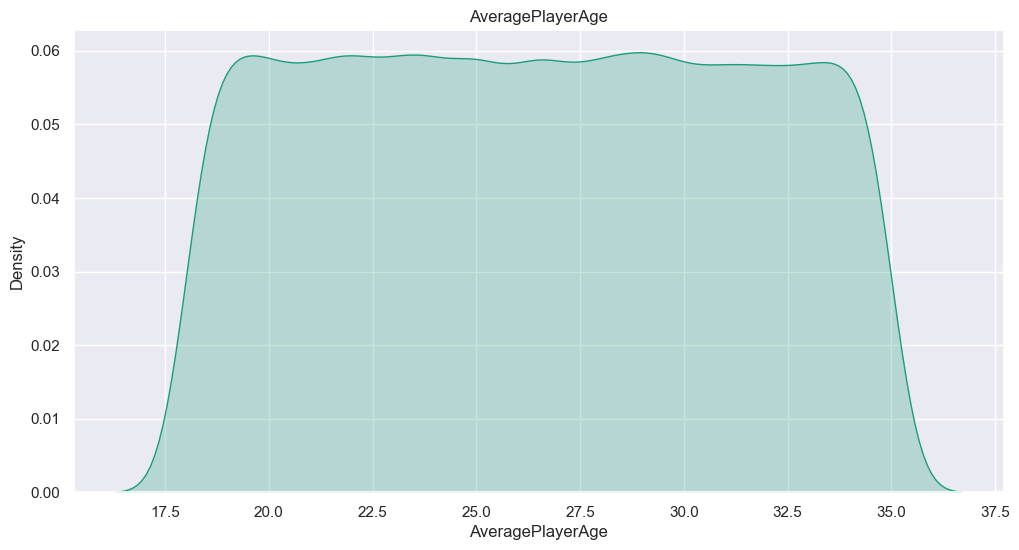

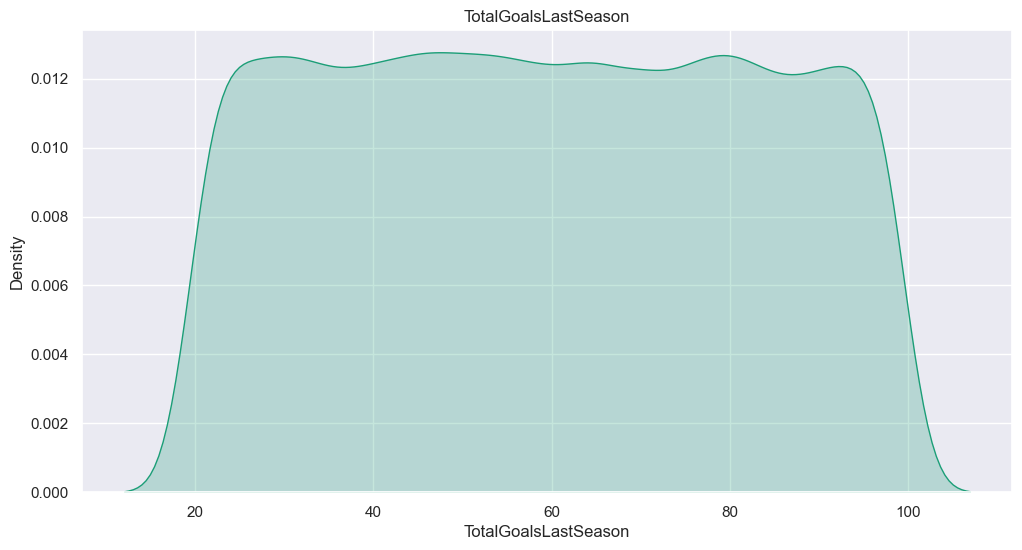

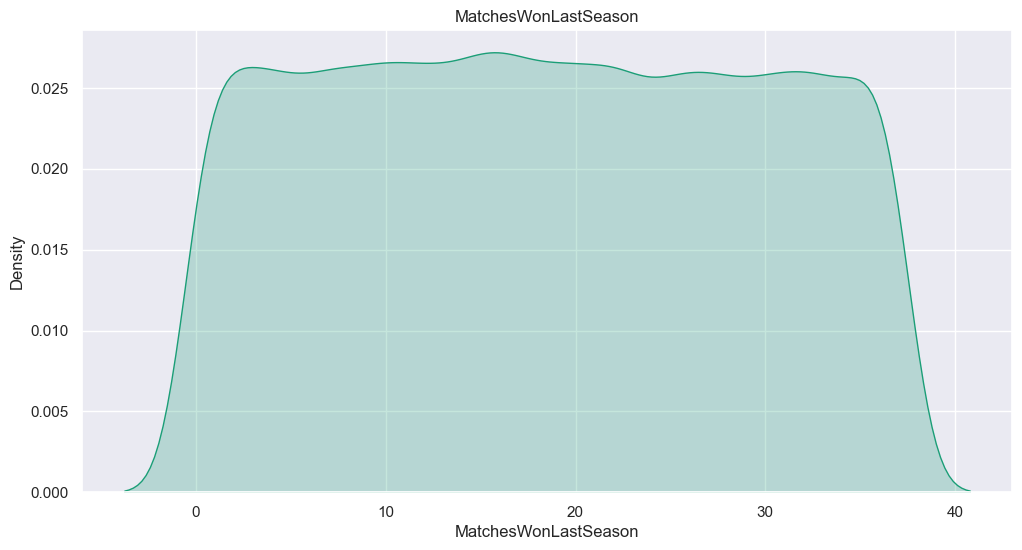

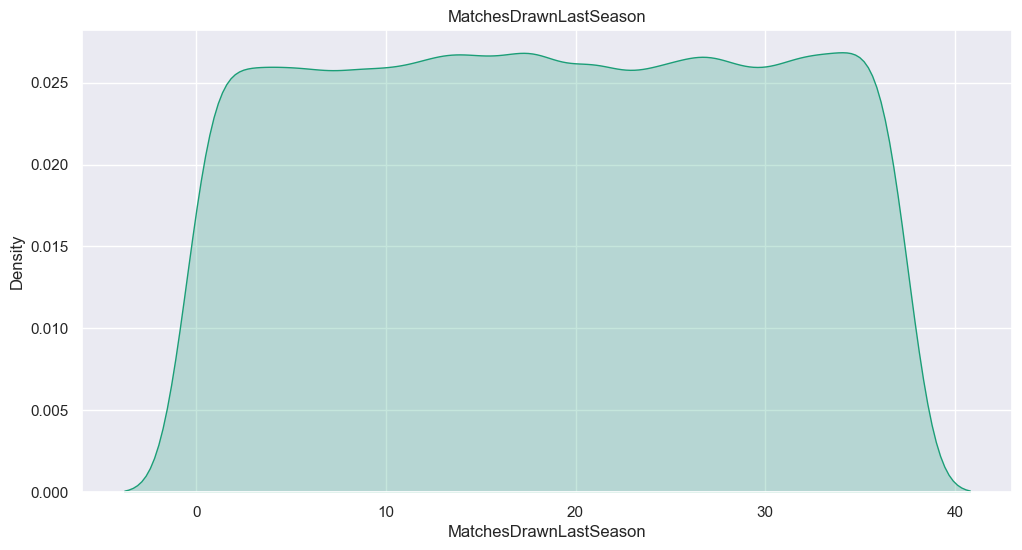

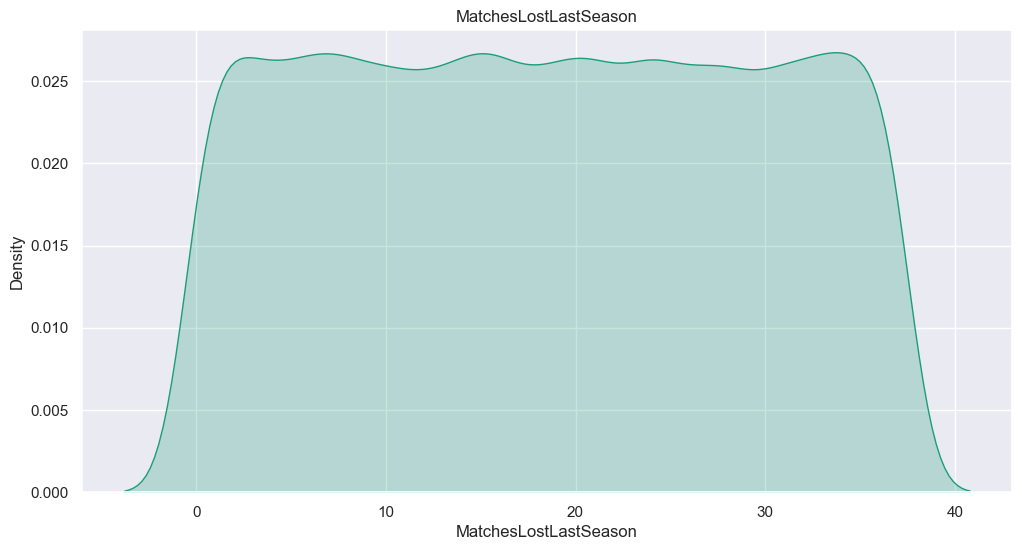

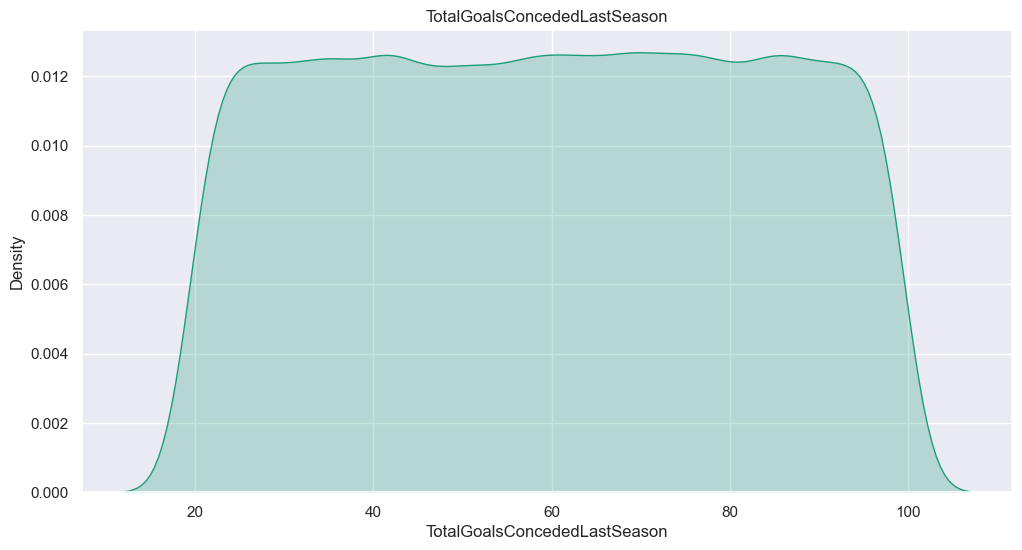

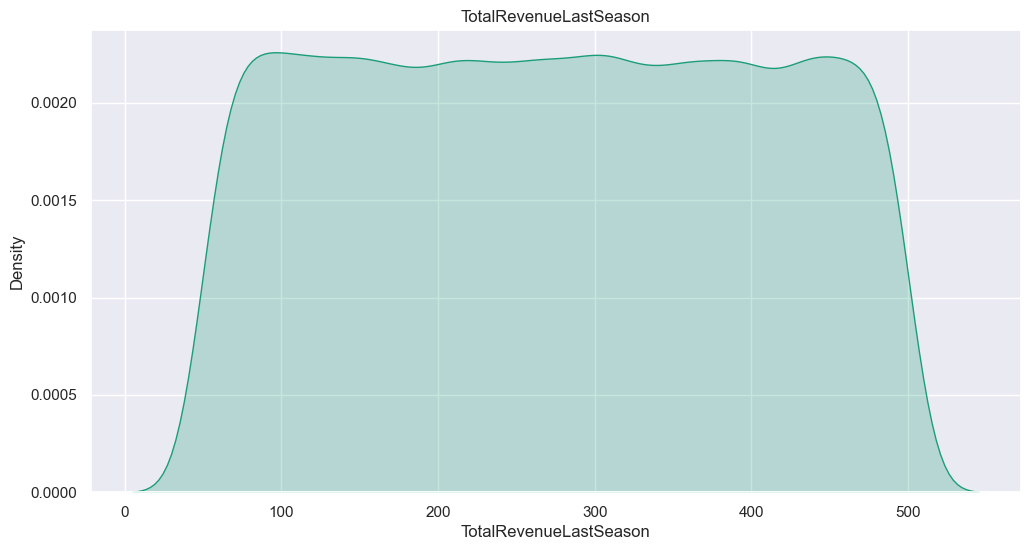

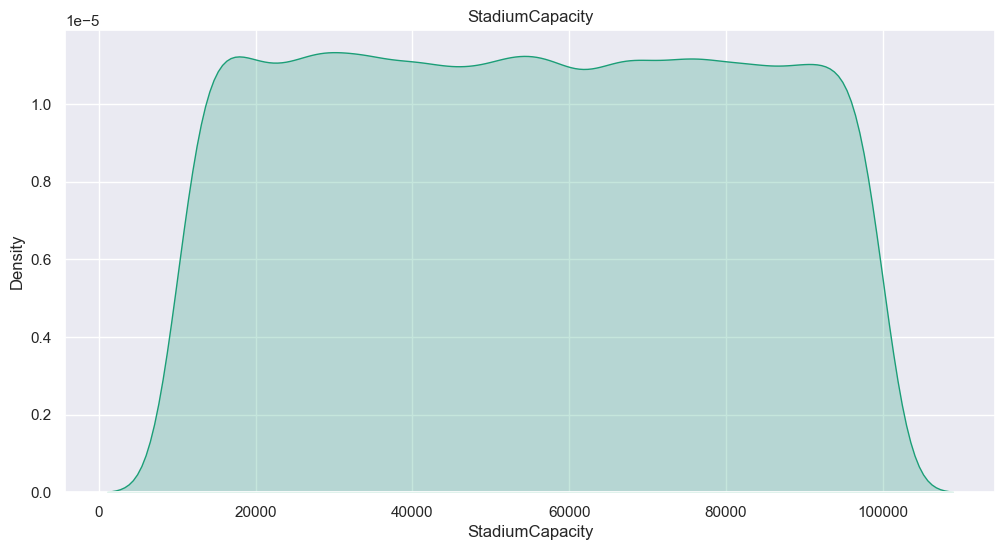

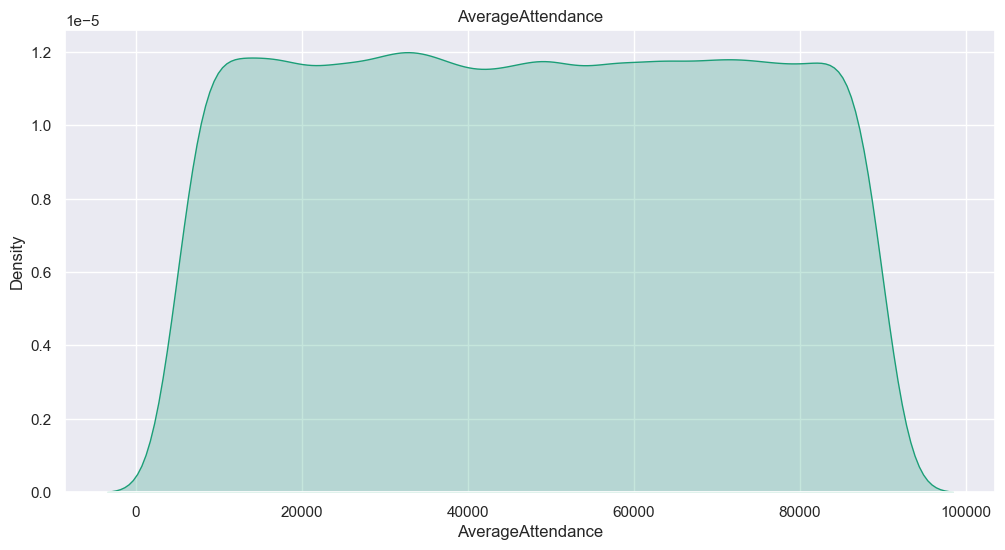

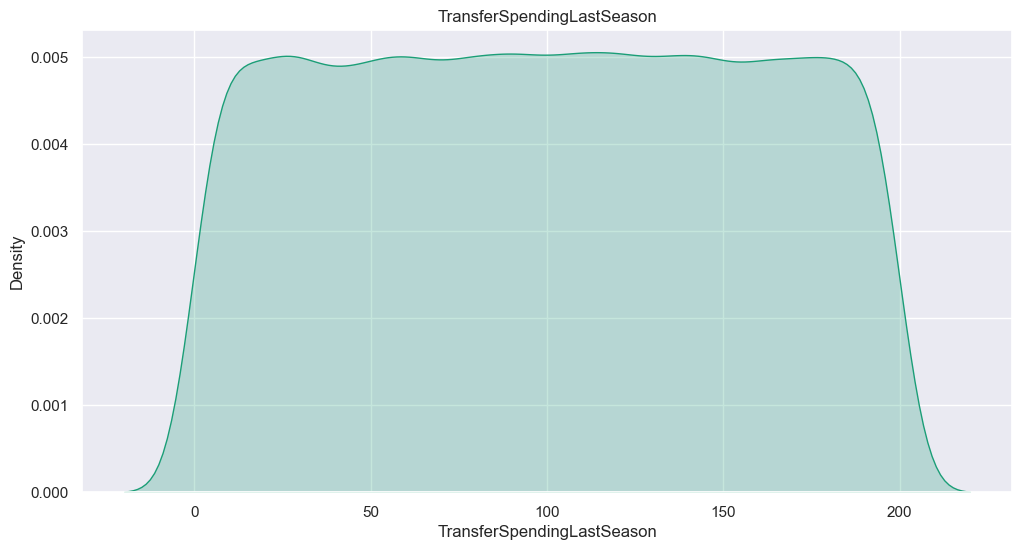

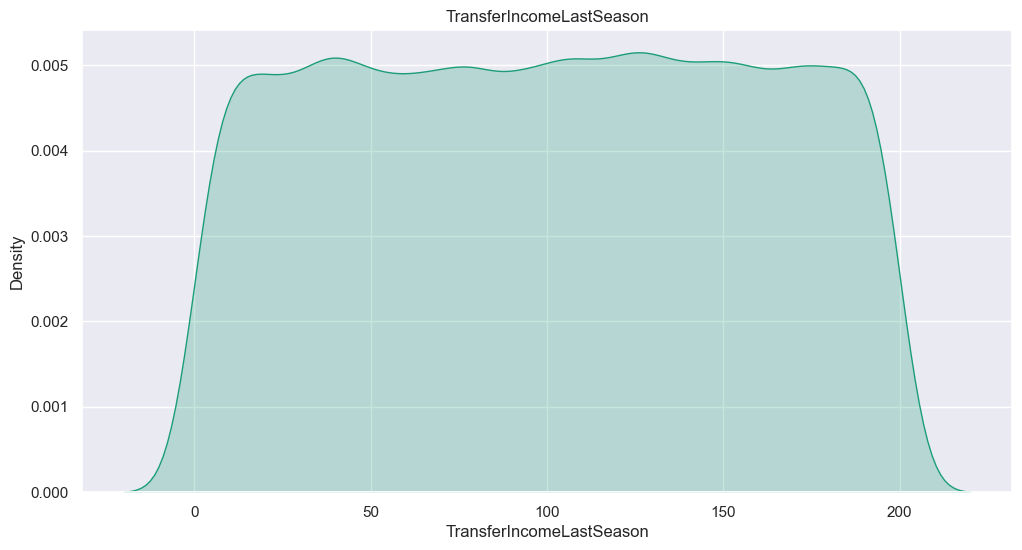

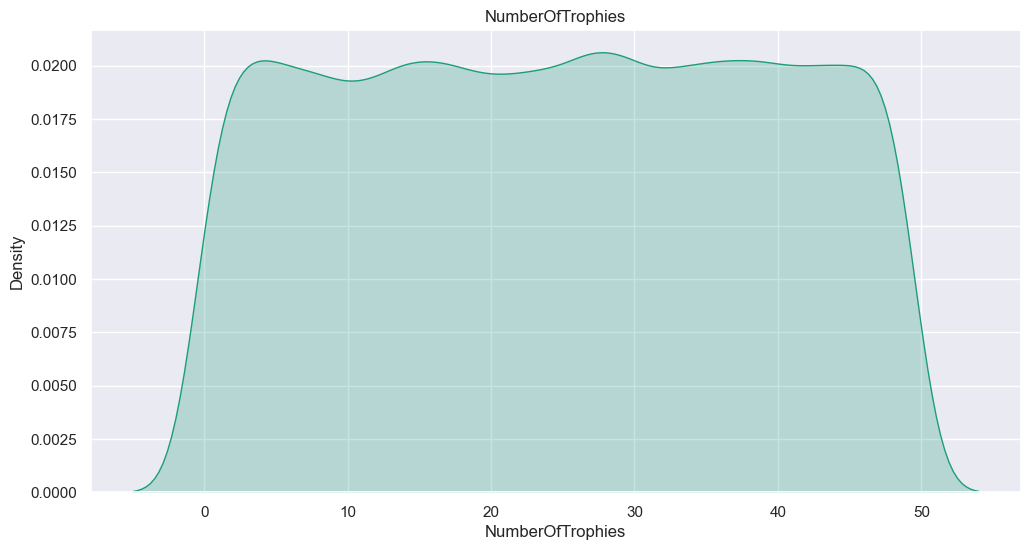

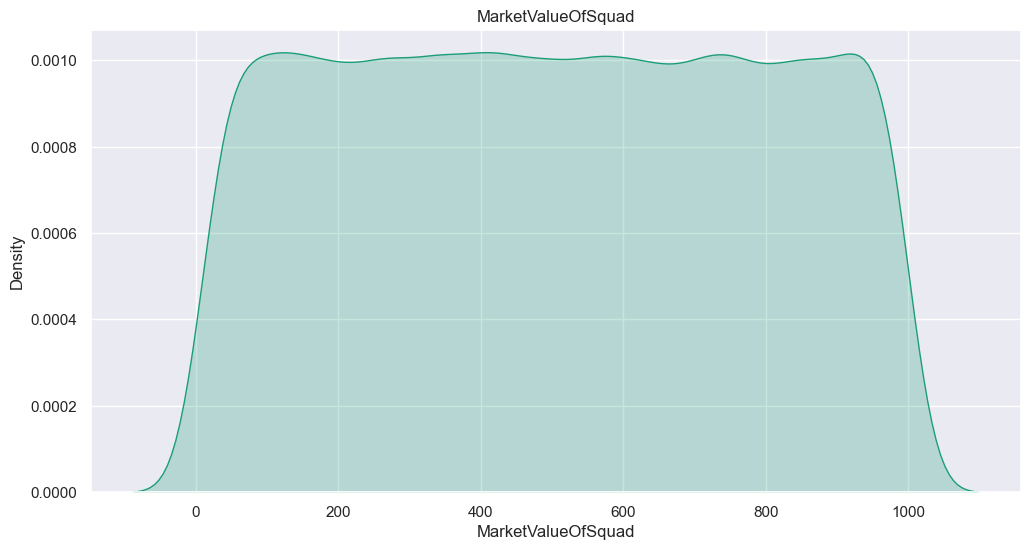

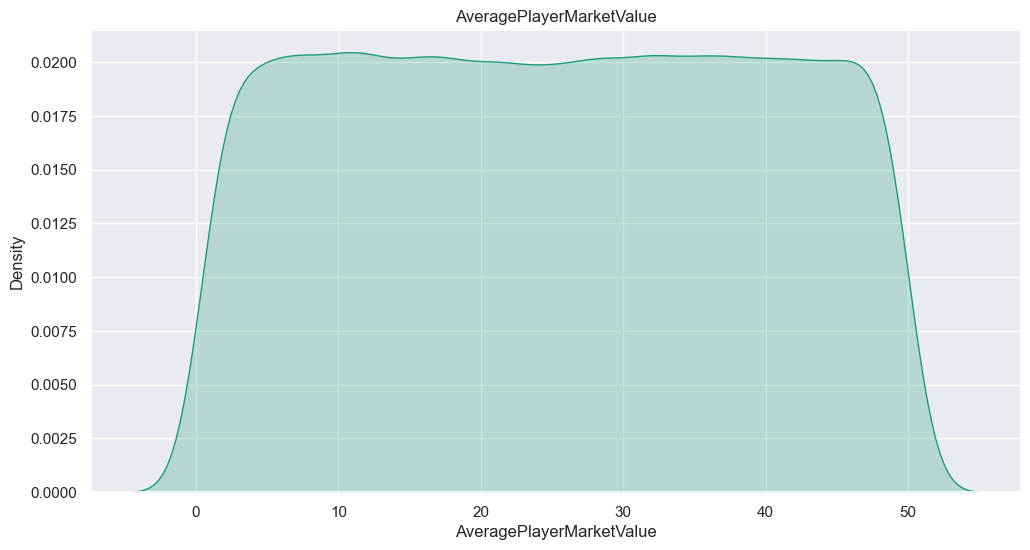

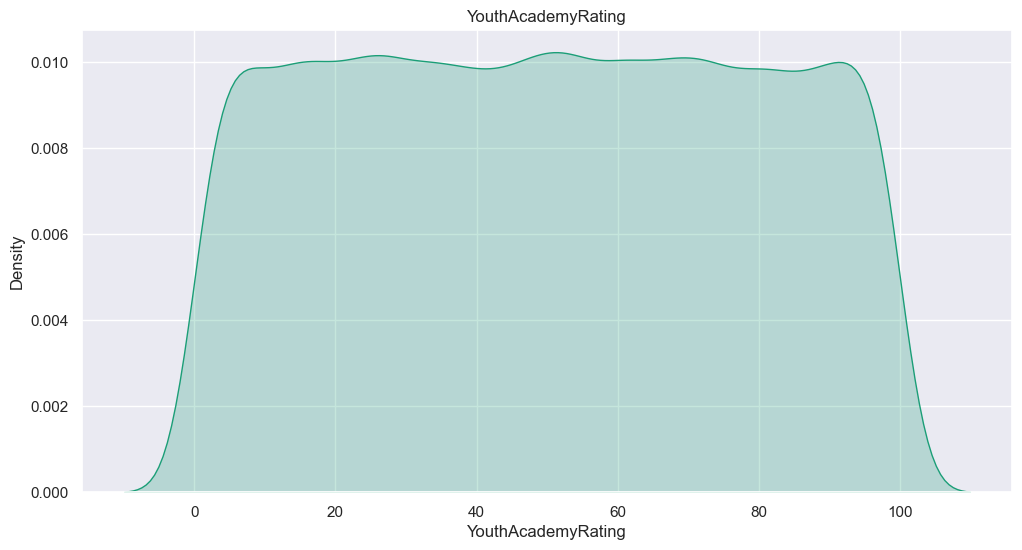

In [35]:
plot_dens(number_colu)

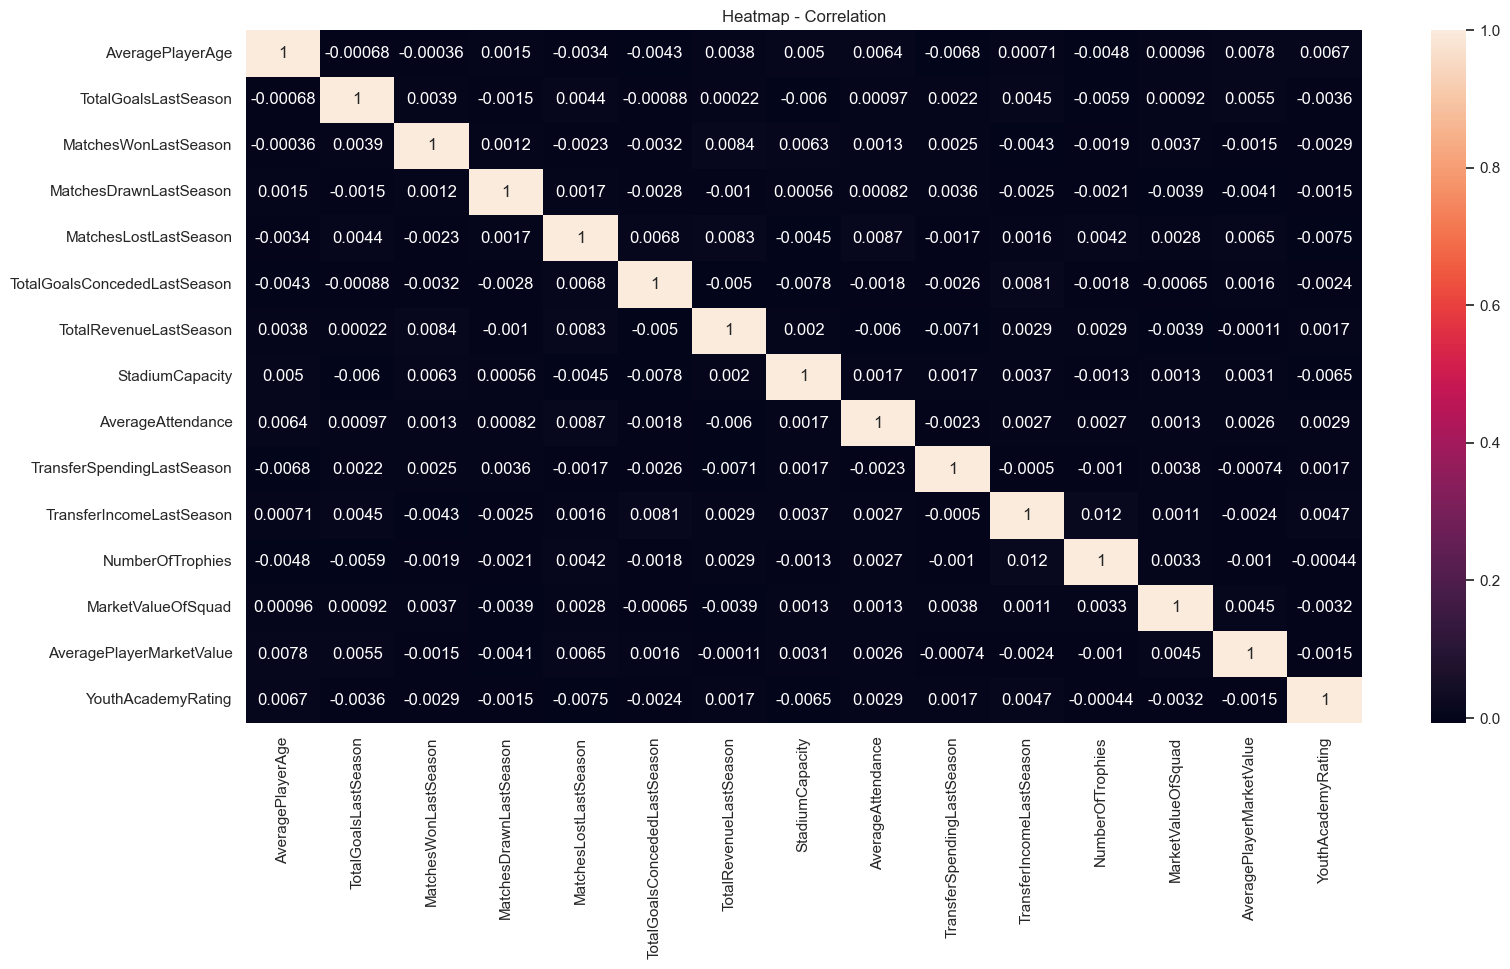

In [36]:
# heatmap
num_corr = df.select_dtypes(include= 'number').corr(method= 'pearson')
plt.figure(figsize= (18, 9))
sns.heatmap(num_corr, annot= True)
plt.title('Heatmap - Correlation')
plt.show()

In [37]:
def box_plots_numeric(col) :
    """
        Function that show box plots for all numeric features

        Args:
            col -> list of numeric columns from dataset
    """
    for x in col :
        sns.boxplot(df[x])
        plt.title(x)
        plt.show()

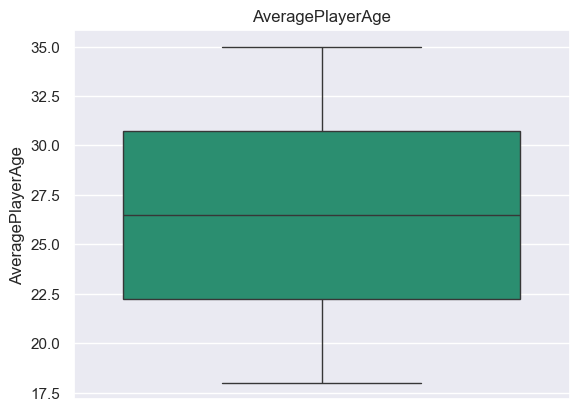

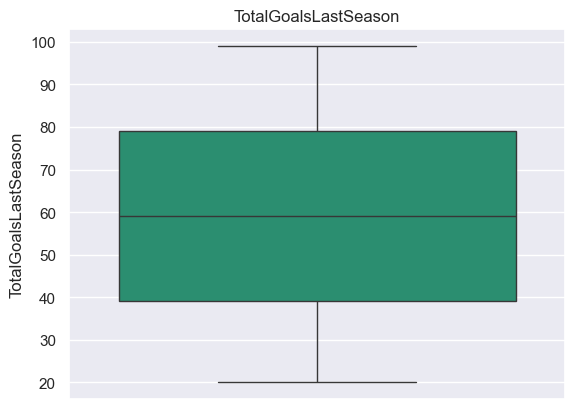

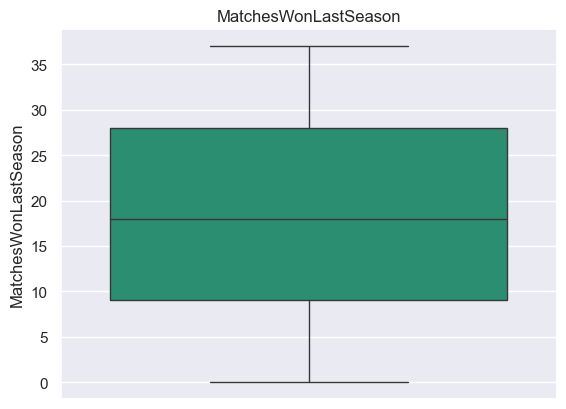

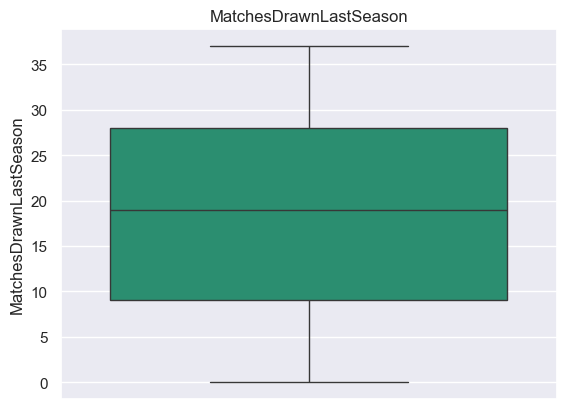

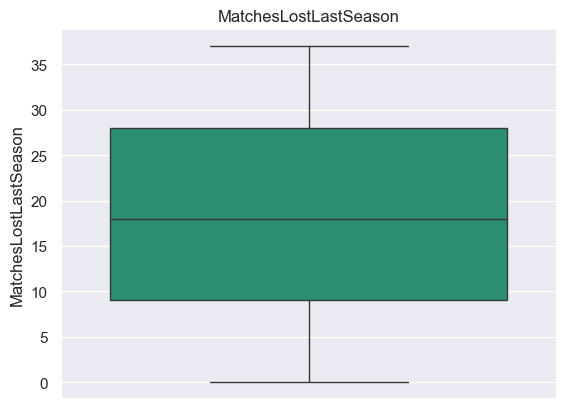

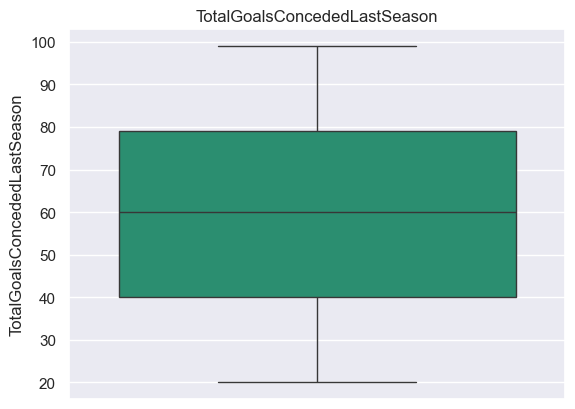

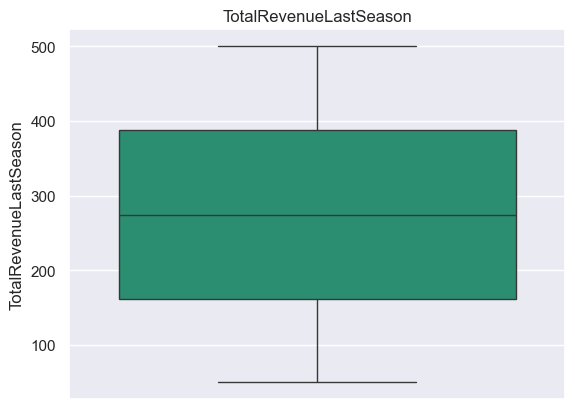

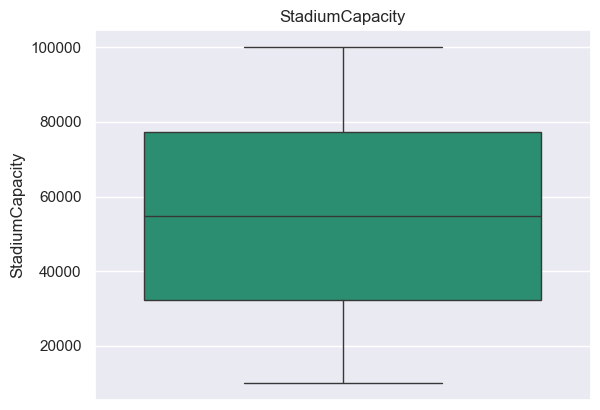

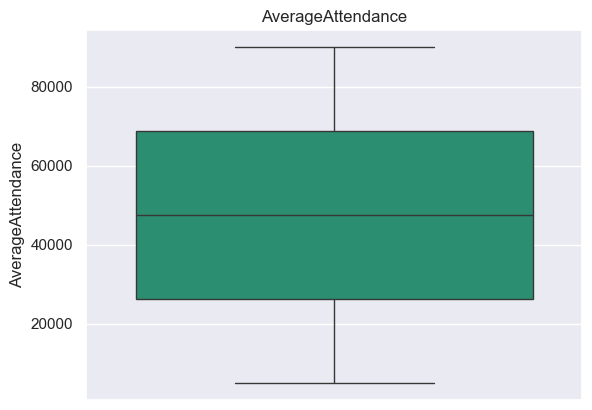

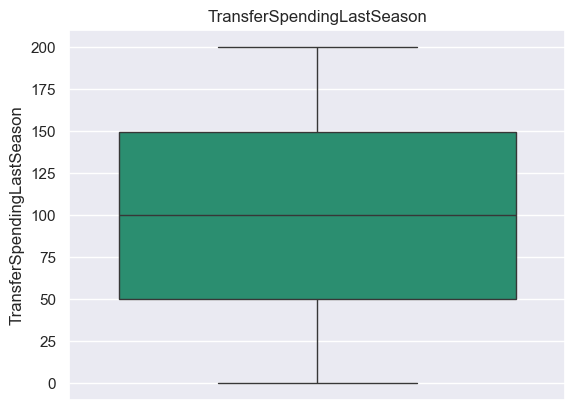

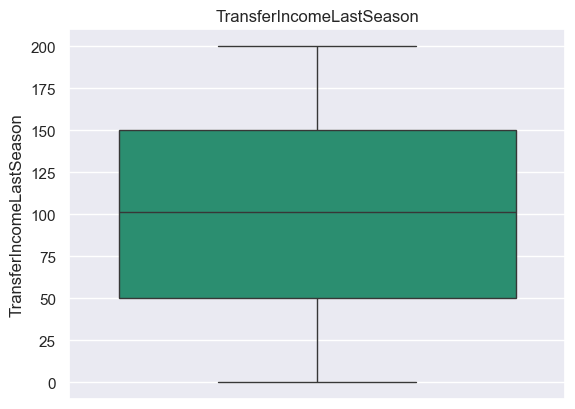

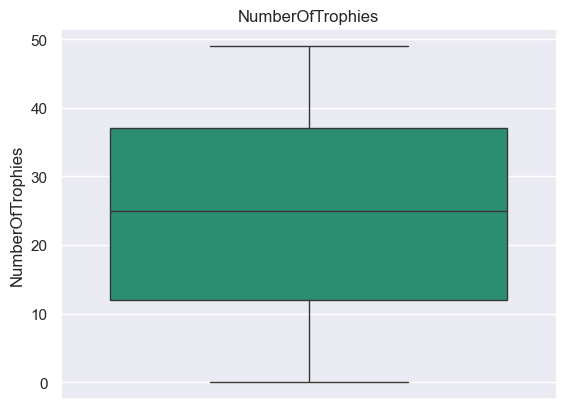

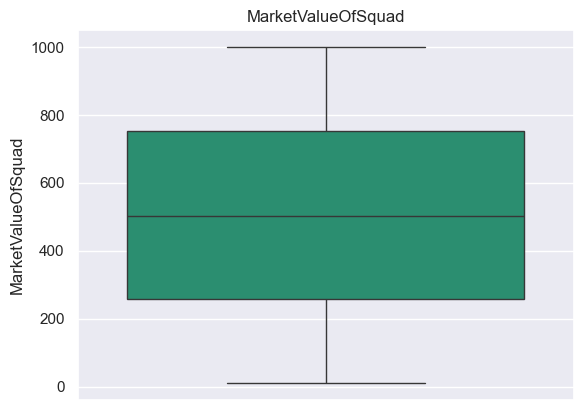

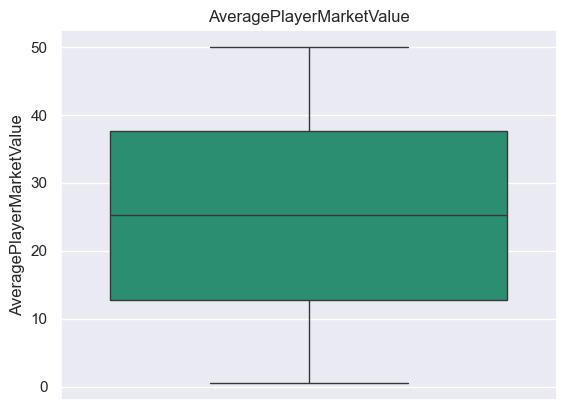

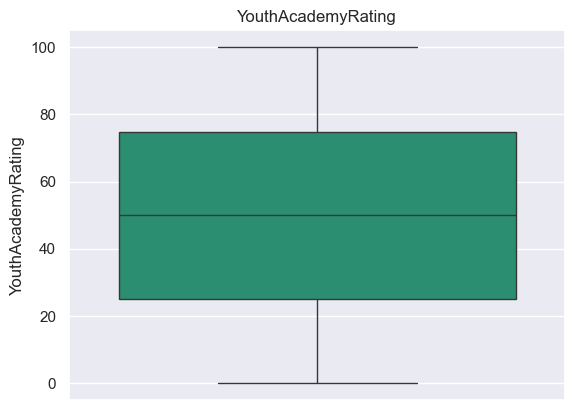

In [38]:
box_plots_numeric(df.select_dtypes('number'))

## 4. Data Cleaning

In [39]:
df.head(10)

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,15.847841,14.361253,La Liga,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,"4,375,181,628"
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,26.731697,23.967076,Bundesliga,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,"859,750,388"
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,21.365171,64.309831,Ligue 1,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,"2,168,913,729"
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,168.683160,6,177.561791,21.483504,82.352127,La Liga,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,"1,426,481,894"
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,188.768072,11,562.114099,26.938414,90.614463,Serie A,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,"4,038,110,631"
5,20.651907,56,14,37,28,21,126.570639,66719,14053.340705,176.145643,80.655851,45,272.202712,22.709637,64.863606,Bundesliga,Italy,Manager A,3-5-2,Possession,City E,Classic,Sponsor B,Manufacturer A,Private,"2,151,643,001"
6,18.987421,69,34,20,33,49,344.162281,50294,83196.194545,89.292513,167.311119,41,110.908067,36.344860,7.620956,Ligue 1,Spain,Manager B,4-3-3,Attacking,City C,Modern,Sponsor B,Manufacturer B,Consortium,"3,676,155,776"
7,32.724994,64,22,30,8,37,139.001745,42509,39296.663364,138.008068,87.705276,23,718.024646,40.356700,26.957119,Bundesliga,France,Manager A,4-4-2,Possession,City D,Modern,Sponsor D,Manufacturer B,Private,"4,488,149,680"
8,28.218955,39,30,12,20,90,85.027421,96695,80231.732805,60.472617,17.986541,24,386.682906,16.543693,53.488944,La Liga,Italy,Manager A,3-4-3,Possession,City A,Historical,Sponsor B,Manufacturer B,Public,"2,386,545,683"
9,30.037234,78,14,17,18,41,95.585934,94518,52330.956258,173.546713,80.015731,12,585.157639,30.603943,19.838712,Serie A,France,Manager B,4-4-2,Defensive,City E,Historical,Sponsor D,Manufacturer B,Fan-Owned,"1,811,889,780"


In [40]:
(df.isna().sum() / df.shape[0])*  100

AveragePlayerAge                0.0
TotalGoalsLastSeason            0.0
MatchesWonLastSeason            0.0
MatchesDrawnLastSeason          0.0
MatchesLostLastSeason           0.0
TotalGoalsConcededLastSeason    0.0
TotalRevenueLastSeason          0.0
StadiumCapacity                 0.0
AverageAttendance               0.0
TransferSpendingLastSeason      0.0
TransferIncomeLastSeason        0.0
NumberOfTrophies                0.0
MarketValueOfSquad              0.0
AveragePlayerMarketValue        0.0
YouthAcademyRating              0.0
League                          0.0
Country                         0.0
Manager                         0.0
TeamFormation                   0.0
PlayingStyle                    0.0
HomeCity                        0.0
StadiumType                     0.0
MainSponsor                     0.0
KitManufacturer                 0.0
OwnershipType                   0.0
Price                           0.0
dtype: float64

## 5. Feature Enginering

In [42]:
# Copy of dataset
df_copy = df.copy()

In [43]:
# Save copy to CSV
df_copy.to_csv('CSV\Football_teams_price_data_copy.csv')

In [41]:
df.head()

,AveragePlayerAge,TotalGoalsLastSeason,MatchesWonLastSeason,MatchesDrawnLastSeason,MatchesLostLastSeason,TotalGoalsConcededLastSeason,TotalRevenueLastSeason,StadiumCapacity,AverageAttendance,TransferSpendingLastSeason,TransferIncomeLastSeason,NumberOfTrophies,MarketValueOfSquad,AveragePlayerMarketValue,YouthAcademyRating,League,Country,Manager,TeamFormation,PlayingStyle,HomeCity,StadiumType,MainSponsor,KitManufacturer,OwnershipType,Price
0,24.367182,28,16,36,20,51,337.552001,55766,5229.742720,177.592126,79.972750,49,713.968872,15.847841,14.361253,La Liga,England,Manager B,4-2-3-1,Counter-Attack,City C,Multipurpose,Sponsor B,Manufacturer B,Private,"4,375,181,628"
1,34.162143,89,12,35,31,84,264.850402,15307,46172.738882,125.441952,7.679349,38,236.644694,26.731697,23.967076,Bundesliga,Spain,Manager C,3-4-3,Defensive,City C,Multipurpose,Sponsor A,Manufacturer B,Consortium,"859,750,388"
2,30.443897,43,3,9,28,72,363.423205,77050,78334.254989,43.776137,136.648762,38,410.502058,21.365171,64.309831,Ligue 1,Spain,Manager C,3-5-2,Attacking,City D,Classic,Sponsor A,Manufacturer C,Consortium,"2,168,913,729"
3,28.177194,84,19,19,34,22,296.719959,61440,60080.423819,183.936395,168.683160,6,177.561791,21.483504,82.352127,La Liga,Italy,Manager C,4-3-3,Counter-Attack,City C,Classic,Sponsor D,Manufacturer B,Consortium,"1,426,481,894"
4,20.652317,36,36,10,9,80,480.928532,78563,10940.950513,14.881518,188.768072,11,562.114099,26.938414,90.614463,Serie A,France,Manager D,4-2-3-1,Counter-Attack,City D,Historical,Sponsor C,Manufacturer B,Consortium,"4,038,110,631"


In [ ]:
# Total matches Last Season
df['TotalMatches'] = df['MatchesWonLastSeason'] + df['MatchesDrawnLastSeason'] + df['MatchesLostLastSeason']

In [ ]:
# Goal Difference
df['GoalDiff'] = df['TotalGoalsLastSeason'] - df['TotalGoalsConcededLastSeason']

In [ ]:
# Transfer Spend_Income Diff.
df['TransferSpendIncomeDiff'] = df['TransferSpendingLastSeason'] - df['TransferIncomeLastSeason']